<a href="https://colab.research.google.com/github/lrrbrody/TDI/blob/master/TDI_Project_Proposal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.milliontreesnyc.org/html/newsroom/pr_milliontreesnyc_launch.shtml
https://www.milliontreesnyc.org/html/about/letter.shtml
https://www1.nyc.gov/office-of-the-mayor/news/862-15/mayor-de-blasio-celebrates-one-millionth-tree-former-mayor-michael-bloomberg-bette-midler-#/0
https://en.wikipedia.org/wiki/PlaNYC
https://www.nycgovparks.org/trees/treescount

https://www.census.gov/quickfacts/fact/table/newyorkcountymanhattanboroughnewyork,bronxcountybronxboroughnewyork,queenscountyqueensboroughnewyork,kingscountybrooklynboroughnewyork,richmondcountystatenislandboroughnewyork,newyorkcitynewyork/PST045218#

https://www.baruch.cuny.edu/nycdata/income-taxes/hhold_income-numbers.htm

https://data.cityofnewyork.us/Environment/1995-Street-Tree-Census/kyad-zm4j
https://data.cityofnewyork.us/Environment/2005-Street-Tree-Census/29bw-z7pj
https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh


https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i
https://data.cityofnewyork.us/Public-Safety/NYPD-Arrests-Data-Historic-/8h9b-rp9u
https://data.cityofnewyork.us/Public-Safety/NYPD-Shooting-Incident-Data-Historic-/833y-fsy8
https://data.cityofnewyork.us/Education/2005-2015-Graduation-Outcomes/qk7d-gecv
https://data.cityofnewyork.us/Education/2016-2017-Graduation-Outcomes-School/nb39-jx2v
https://data.cityofnewyork.us/Health/DOHMH-Community-Health-Survey-2010-2016-/csut-3wpr

https://www1.nyc.gov/assets/planning/download/pdf/planning-level/nyc-population/census2000/sociopp.pdf

In [1]:
#Connect to drive to access saved datasets
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Get setup and load the three tree datasets from 1995, 2005, 2015
import pandas as pd

#Load 1995 NYC Tree Census https://data.cityofnewyork.us/Environment/1995-Street-Tree-Census/kyad-zm4j
Tree95=pd.read_csv("/content/drive/My Drive/1995_Street_Tree_Census.csv")

In [3]:
Tree95.head(3)

,RecordId,Address,House_Number,Street,Postcode_Original,Community Board_Original,Site,Species,Diameter,Condition,Wires,Sidewalk_Condition,Support_Structure,Borough,X,Y,Longitude,Latitude,CB_New,Zip_New,CensusTract_2010,CensusBlock_2010,NTA_2010,SegmentID,Spc_Common,Spc_Latin,Location,Council District,BIN,BBL
0,1,245 E 17 ST,245.0,E 17 ST,10003,106,Front,PLAC,8,Unknown,None,NaN,None,Manhattan,988618.9688,206893.7640,-73.984235,40.734551,106,10003,48.0,2000.0,MN21,33134,LONDON PLANETREE,PLATANUS ACERIFOLIA,"(40.734551, -73.984235)",2.0,1019566.0,1.008980e+09
1,2,80 N MOORE ST,80.0,N MOORE ST,10013,101,Side,ACPL,7,Good,None,Good,None,Manhattan,981330.4271,201649.9518,-74.010532,40.720159,101,10013,39.0,2001.0,MN24,31567,"MAPLE, NORWAY",ACER PLATANOIDES,"(40.720159, -74.010532)",1.0,1083157.0,1.001420e+09
2,3,80 N MOORE ST,80.0,N MOORE ST,10013,101,Side,ACPL,6,Good,None,Good,None,Manhattan,981330.4271,201649.9518,-74.010532,40.720159,101,10013,39.0,2001.0,MN24,31567,"MAPLE, NORWAY",ACER PLATANOIDES,"(40.720159, -74.010532)",1.0,1083157.0,1.001420e+09


In [0]:
#Load 2005 NYC Tree Census https://data.cityofnewyork.us/Environment/2005-Street-Tree-Census/29bw-z7pj
Tree05=pd.read_csv("/content/drive/My Drive/2005_Street_Tree_Census.csv", low_memory=False)

In [5]:
Tree05.head(3)

,OBJECTID,cen_year,tree_dbh,address,tree_loc,pit_type,soil_lvl,status,spc_latin,spc_common,vert_other,vert_pgrd,vert_tgrd,vert_wall,horz_blck,horz_grate,horz_plant,horz_other,sidw_crack,sidw_raise,wire_htap,wire_prime,wire_2nd,wire_other,inf_canopy,inf_guard,inf_wires,inf_paving,inf_outlet,inf_shoes,inf_lights,inf_other,trunk_dmg,zipcode,zip_city,cb_num,borocode,boroname,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,objectid_1,census tract,bin,bbl,Location 1
0,592373,2005,6,1139 57 STREET,Front,Sidewalk Pit,Level,Good,PYRUS CALLERYANA,"PEAR, CALLERY",No,No,No,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,None,11219,Brooklyn,312,3,Brooklyn,44,48,17,BK88,Borough Park,3021600.0,New York,40.632653,-74.000245,984182,169769,0,216.0,3140038.0,3.056890e+09,"(40.63265321, -74.00024499)"
1,592374,2005,6,2220 BERGEN AVENUE,Across,Sidewalk Pit,Level,Good,PLATANUS ACERIFOLIA,LONDON PLANETREE,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,None,11234,Brooklyn,318,3,Brooklyn,46,59,19,BK45,Georgetown-Marine Park-Bergen Beach-Mill Basin,3070600.0,New York,40.620084,-73.901453,1011608,165205,1,706.0,3238037.0,3.084440e+09,"(40.62008375, -73.9014528)"
2,592375,2005,13,2360 BERGEN AVENUE,Front,Continuous Pit,Level,Good,ACER PLATANOIDES CRIMSON KING,"MAPLE, NORWAY-CR KNG",No,No,No,No,No,No,Yes,Yes,No,No,Yes,Yes,Yes,No,No,No,No,Yes,No,No,No,Yes,Cavity,11234,Brooklyn,318,3,Brooklyn,46,59,19,BK45,Georgetown-Marine Park-Bergen Beach-Mill Basin,3070600.0,New York,40.617996,-73.899111,1012259,164445,2,706.0,3238299.0,3.084530e+09,"(40.61799567, -73.89911096)"


In [0]:
#Load 2015 NYC Tree Census https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh
Tree15=pd.read_csv("/content/drive/My Drive/2015_Street_Tree_Census_-_Tree_Data.csv")

In [7]:
Tree15.head(3)

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375,Forest Hills,406,4,Queens,29,28,16,QN17,Forest Hills,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,147-074 7 AVENUE,11357,Whitestone,407,4,Queens,19,27,11,QN49,Whitestone,4097300,New York,40.794111,-73.818679,1034455.701,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,390 MORGAN AVENUE,11211,Brooklyn,301,3,Brooklyn,34,50,18,BK90,East Williamsburg,3044900,New York,40.717581,-73.936608,1001822.831,200716.8913,34.0,449.0,3338310.0,3.028870e+09


In [0]:
#Would love better visuals, but better to get basic ones done now and hit requirements. Can make better later. 
#import seaborn as sns
#sns.set(style="darkgrid")
#T95 = sns.load_dataset("Tree95")
#ax = sns.countplot(x="Borough", data=Tree95)
#ax = sns.countplot(x="boroname", data=Tree05)

In [9]:
#Combine counts for each year grouped by borough to compare results
Count95=Tree95.groupby(Tree95['Borough']).count()
Count95 = Count95.iloc[:,0:1]
Count95.columns = ['1995']
Count95

,1995
Borough,
Bronx,48487
Brooklyn,117101
Manhattan,47215
Queens,227552
Staten Island,76634


In [10]:
Count05=Tree05.groupby(Tree05['boroname']).count()
Count05 = Count05.iloc[:,0:1]
Count05.columns = ['2005']
Borough = ["Staten Island", "Bronx", "Brooklyn", "Manhattan", "Queens"]
Count05['Borough'] = Borough
Count05.set_index('Borough', inplace=True)
Count05

,2005
Borough,
Staten Island,99701
Bronx,59925
Brooklyn,142852
Manhattan,49886
Queens,240008


In [11]:
Count15=Tree15.groupby(Tree15['borough']).count()
Count15 = Count15.iloc[:,0:1]
Count15.columns = ['2015']
Count15

,2015
borough,
Bronx,85203
Brooklyn,177293
Manhattan,65423
Queens,250551
Staten Island,105318


In [12]:
#Join the borough counts for the 3 years to make a simple plot
Counts=Count95.join(Count05)
Counts=Counts.join(Count15)
Borough = ["Bronx", "Brooklyn", "Manhattan", "Queens", "Staten Island"]
Counts['Borough'] = Borough
Counts

,1995,2005,2015,Borough
Borough,,,,
Bronx,48487,59925,85203,Bronx
Brooklyn,117101,142852,177293,Brooklyn
Manhattan,47215,49886,65423,Manhattan
Queens,227552,240008,250551,Queens
Staten Island,76634,99701,105318,Staten Island


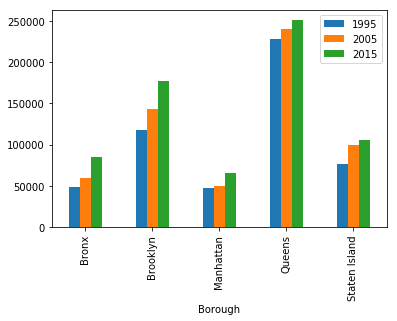

In [13]:
#Basic plot (for now) to confirm intuition and press releases that there are more trees in NYC now than before (or at least more recorded trees)
TreePlot=Counts.plot(x="Borough", y=["1995", "2005", "2015"], kind="bar")
TreePlot
#Looks like the PR didn't lie, certainly seem to be adding trees over the years

In [14]:
#Filter the three dataset to confirm that trees volunteers are counting (and in the plot above) are actual live trees and not stumps/dead
Status15=Tree15.groupby("status").count()
Status15 = Status15.iloc[:,0:1]
Status15.columns = ['2015']
Status15
#Health/Status columns end up being more consistent than alive/dead, so using those for now. 

,2015
status,
Alive,652173
Dead,13961
Stump,17654


In [41]:
#Filter datasets for tree health 
Alive15=Tree15[(Tree15['status']) == "Alive"]
Health15=Alive15.groupby('health').count()
Health15 = Health15.iloc[:,0:1]
Health15.columns = ['2015']
Health15.loc[-1] = [13961] #Taken from counts above manually because it was a separate column for this dataset
Status = ["Good", "Excellent", "Poor", "Dead"]
Health15['Status'] = Status
Health15.set_index('Status', inplace=True)
Health15

,2015
Status,
Good,96504
Excellent,528850
Poor,26818
Dead,13961


In [32]:
Alive05=Tree05.groupby("status").count()
Alive05 = Alive05.iloc[:,0:1]
Alive05.columns = ['2005']
Status = ["Dead", "Excellent", "Good", "Poor"]
Alive05['Status'] = Status
Alive05.set_index('Status', inplace=True)
Alive05

,2005
Status,
Dead,8120
Excellent,141657
Good,393464
Poor,49131


In [30]:
Cond95=Tree95.groupby("Condition").count()
Cond95 = Cond95.iloc[0:7,0:1]
Status95 = ["Critical", "Dead", "Excellent", "Fair", "Good", "Planting_Space", "Poor"]
Cond95['Status'] = Status95
Cond95=Cond95[Cond95["Status"] != "Critical"] #only 2, dropping for now
Cond95=Cond95[Cond95["Status"] != "Planting_Space"] #not useful for now and doesn't match the other datasets, dropping for now
Cond95=Cond95[Cond95["Status"] != "Fair"] #added to 'Good'
Cond95.set_index('Status', inplace=True)
Cond95.columns = ['1995']
Cond95.at['Good', '1995'] = (332562 + 327) #sum of "fair" and "good" since the other datasets don't have this particular distinction
Cond95

,1995
Status,
Dead,12859
Excellent,100286
Good,332889
Poor,38571


In [38]:
#Joining the tree statuses from the 3 years to build a simple plot
ActualTrees=Cond95.join(Alive05)
ActualTrees=ActualTrees.join(Health15)
Status = ["Dead", "Excellent", "Good", "Poor"]
ActualTrees['Status'] = Status
ActualTrees

,1995,2005,2015,Status
Status,,,,
Dead,12859,8120,13961,Dead
Excellent,100286,141657,528850,Excellent
Good,332889,393464,96504,Good
Poor,38571,49131,26818,Poor


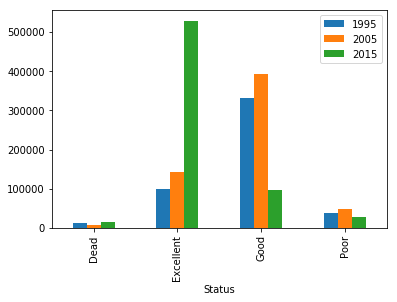

In [39]:
#Visual to confirm the tree count going up doesn't have a ton of dead/stump/empty plots.
ActualTreesPlot=ActualTrees.plot(x="Status", y=["1995", "2005", "2015"], kind="bar")
ActualTreesPlot
#Looks pretty good, deeper looking should consider combining "excellent" and "good" to see if it evens things out 
#(maybe more trees had a positive effect and volunteers had a better outlook!)

Conclusions:
2015 Street Tree census certainly shows more trees in NYC than in 1995 or 2005, and those trees seem to be doing well. 

For next time: 
- better plots
- more datasets to look for "better" life factors:
  - less crime? or less violent crime? specific to parks or less dense tree areas?
  - less asthma related hospitalizations?
  - higher incomes? specific to certain areas/tree densities?
  - higher graduation rates? 
  
Is there a correlation or additional observations that can be made regarding the above or similar?

Do other cities with similar initiatives have similar correlations? 
LA and London both have improvement initiatives and open datasets online. 